In [2]:
import pandas as pd

# CSV 파일을 불러옵니다. (파일 경로를 올바르게 설정하세요)
df = pd.read_csv('tourism_data.csv', encoding='cp949')

# 피벗 테이블을 사용하여 데이터 구조를 변경합니다.
df_pivot = df.pivot_table(
    index=['SGGCD', 'SGG_NM'],  # 인덱스는 'SGGCD'와 'SGG_NM'으로 설정합니다.
    columns='TURSM_DNS_DIV_NM',  # 'TURSM_DNS_DIV_NM'이 열로 변환됩니다.
    values='TURSM_DNS_DIV_VAL2',  # 'TURSM_DNS_DIV_VAL2' 값이 테이블 내 값이 됩니다.
    aggfunc='first'  # 중복된 항목이 없으므로 첫 번째 값을 사용합니다.
)

# 열 이름을 알맞게 변경합니다.
df_pivot.columns.name = None  # 기존 열 이름 그룹화를 해제합니다.
df_pivot.reset_index(inplace=True)  # 인덱스를 다시 열로 변환합니다.

print(df_pivot.head())
# 결과를 CSV 파일로 저장합니다.
df_pivot.to_csv('tourism_data_transformed.csv', index=False, encoding='utf-8')
# 
print("데이터 구조 변환이 완료되었습니다.")


   SGGCD SGG_NM  관광소비  목적지 검색량  방문자유입  숙박방문자 비율  체류시간
0  43130    충주시    97       72    134        78    22
1  43150    제천시   151      104    168       114    30
2  43720    보은군   214      214    227       230   185
3  43730    옥천군   215      222    185       214   221
4  43740    영동군   238      236    224       218    45
데이터 구조 변환이 완료되었습니다.


In [3]:
import pandas as pd

file_path = '관광유사도.csv'
df = pd.read_csv(file_path)

df.head()

,SGGCD,SGG_NM,관광소비,목적지 검색량,방문자유입,숙박방문자 비율,체류시간
0,43130,충주시,97,72,134,78,22
1,43150,제천시,151,104,168,114,30
2,43720,보은군,214,214,227,230,185
3,43730,옥천군,215,222,185,214,221
4,43740,영동군,238,236,224,218,45


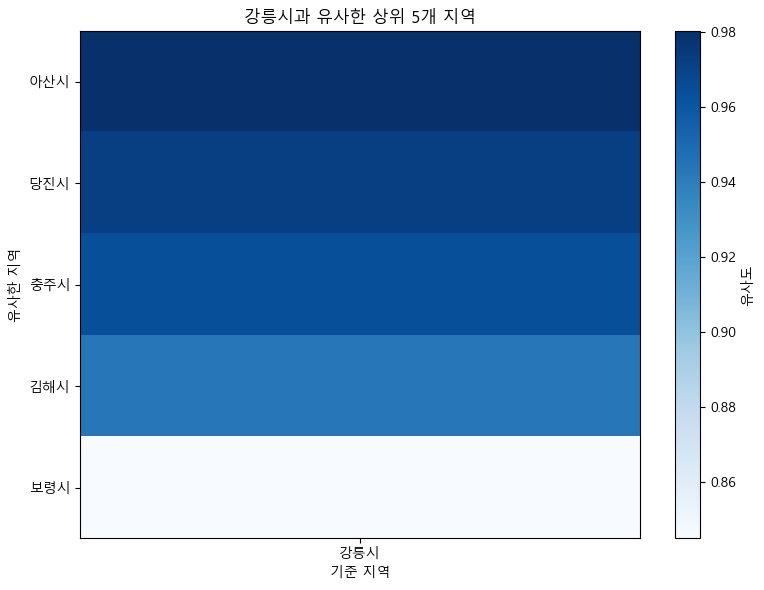

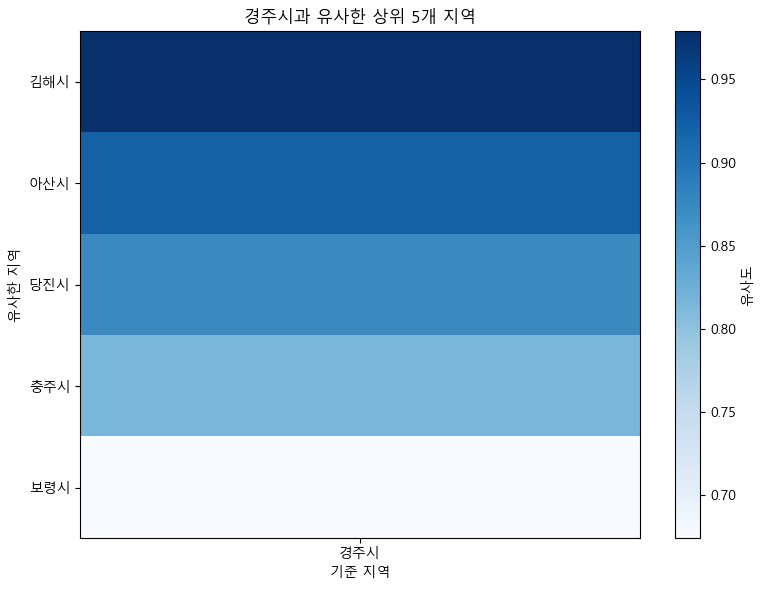

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자의 경우
plt.rcParams['axes.unicode_minus'] = False

# 지역명을 제외한 지표만 추출
features = df.drop(columns=['SGG_NM', 'SGGCD'])

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features_scaled)

# 유사도 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=df['SGG_NM'], columns=df['SGG_NM'])

# 유사도 매트릭스에서 강원 강릉시, 경북 경주시, 경남 김해시만 선택
regions_of_interest = ['강릉시', '경주시']

# 각 지역과 유사한 상위 5개의 지역 선택 및 시각화
for region in regions_of_interest:
    # 자기 자신을 제외한 유사한 상위 6개 지역 선택 (기준 지역 제외)
    similar_regions = similarity_df[region].sort_values(ascending=False)[1:]
    
    # 강릉시, 경주시를 제외하고 유사한 상위 5개 지역 선택
    filtered_regions = similar_regions[~similar_regions.index.isin(regions_of_interest)].head(5)
    
    # 유사도 매트릭스에서 해당 지역과 상위 유사 지역들만 선택
    filtered_similarity_df = similarity_df.loc[filtered_regions.index, [region]]

    # 히트맵 생성 (matplotlib 사용)
    plt.figure(figsize=(8, 6))
    plt.imshow(filtered_similarity_df, cmap='Blues', aspect='auto')

    # 색상 바 추가
    plt.colorbar(label='유사도')

    # 축 레이블 설정
    plt.xticks(ticks=np.arange(filtered_similarity_df.columns.size), labels=filtered_similarity_df.columns)
    plt.yticks(ticks=np.arange(filtered_similarity_df.index.size), labels=filtered_similarity_df.index)

    # 제목 및 라벨 추가
    plt.title(f"{region}과 유사한 상위 5개 지역")
    plt.xlabel("기준 지역")
    plt.ylabel("유사한 지역")

    # 그래프 표시
    plt.tight_layout()
    plt.show()


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# 지역명을 제외한 지표만 추출
features = df.drop(columns=['SGG_NM', 'SGGCD'])

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features_scaled)

# 유사도 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=df['SGG_NM'], columns=df['SGG_NM'])

# 결과 출력
print("유사도 매트릭스:")
print(similarity_df)

# 각 지역과 유사한 다른 지역 찾기
for region in df['SGG_NM']:
    similar_regions = similarity_df[region].sort_values(ascending=False)
    print(f"\n'{region}'와(과) 유사한 지역:")
    print(similar_regions[1:])  # 자기 자신을 제외한 상위 유사 지역

유사도 매트릭스:
SGG_NM       충주시       제천시       보은군       옥천군       영동군       증평군       진천군  \
SGG_NM                                                                         
충주시     1.000000  0.834997 -0.957340 -0.942379 -0.613744 -0.822104 -0.283412   
제천시     0.834997  1.000000 -0.807107 -0.966273 -0.139360 -0.482701 -0.063500   
보은군    -0.957340 -0.807107  1.000000  0.921885  0.600514  0.877371  0.373128   
옥천군    -0.942379 -0.966273  0.921885  1.000000  0.364852  0.668921  0.157309   
영동군    -0.613744 -0.139360  0.600514  0.364852  1.000000  0.886033  0.644948   
증평군    -0.822104 -0.482701  0.877371  0.668921  0.886033  1.000000  0.676421   
진천군    -0.283412 -0.063500  0.373128  0.157309  0.644948  0.676421  1.000000   
괴산군    -0.997382 -0.822821  0.952615  0.937346  0.624494  0.818589  0.245378   
음성군     0.462223  0.451573 -0.418545 -0.468691  0.147667 -0.067419  0.510494   
단양군    -0.751299 -0.750040  0.798081  0.785635  0.108869  0.481454 -0.038339   
공주시    -0.067311 -0.531104  0.

In [1]:
import requests
import pandas as pd
from matplotlib.pyplot import xlabel


regions = [
    ("43760", "충청북도 괴산군"),
    ("43800", "충청북도 단양군"),
    ("43720", "충청북도 보은군"),
    ("43740", "충청북도 영동군"),
    ("43730", "충청북도 옥천군"),
    ("43770", "충청북도 음성군"),
    ("43150", "충청북도 제천시"),
    ("43745", "충청북도 증평군"),
    ("43750", "충청북도 진천군"),
    ("43130", "충청북도 충주시"),
    ("44250", "충청남도 계룡시"),
    ("44150", "충청남도 공주시"),
    ("44710", "충청남도 금산군"),
    ("44230", "충청남도 논산시"),
    ("44270", "충청남도 당진시"),
    ("44180", "충청남도 보령시"),
    ("44760", "충청남도 부여군"),
    ("44210", "충청남도 서산시"),
    ("44770", "충청남도 서천군"),
    ("44200", "충청남도 아산시"),
    ("44810", "충청남도 예산군"),
    ("44790", "충청남도 청양군"),
    ("44825", "충청남도 태안군"),
    ("44800", "충청남도 홍성군"),
    ("51150", "강원특별자치도 강릉시"),
    ("47130", "경상북도 경주시"),
    ("48250", "경상남도 김해시")
]